In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [33]:
#prijs afhankelijk!!!!! rest onafhankelijk
df1 = df[['price', 'area','rooms', 'year_built']]
df1 = df1.dropna()
df1.head()

,price,area,rooms,year_built
0,510000,108,3,1906
1,215000,47,2,1938
2,325000,116,3,2003
3,315000,58,3,1910
4,200000,63,3,1906


In [34]:
# sns.pairplot(df1)
# plt.show()

In [35]:
df1 = df1[df1['price']>30000]
df1 = df1[df1['area']>=1]
df1 = df1[df1['rooms']>=1]
df1 = df1[df1['year_built']>1600]
df1.head()

,price,area,rooms,year_built
0,510000,108,3,1906
1,215000,47,2,1938
2,325000,116,3,2003
3,315000,58,3,1910
4,200000,63,3,1906


In [36]:
y = df1['price'] #We need to take out the rating as our Y-variable
X = df1.loc[:,'area':'year_built'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
#X.index = df1['index'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,area,rooms,year_built
0,108,3,1906
1,47,2,1938
2,116,3,2003
3,58,3,1910
4,63,3,1906


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,area,rooms,year_built
10023,92,3,2008
2601,28,1,2014
10503,50,2,1906
11126,64,2,1918
11242,116,5,2010


In [38]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [44]:
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
4318.541218,area
-16859.877142,rooms
-1314.963780,year_built


In [40]:
y_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_p)

0.652382523431733

In [41]:
math.sqrt(mean_squared_error(y_test, y_p))

101566.31406622086

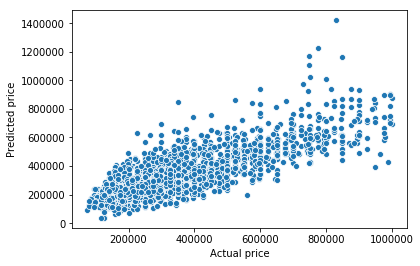

In [43]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()